In [1]:
%matplotlib inline

import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
model = w2v.Word2Vec.load(os.path.join("trained", "GOT.w2v"))

In [4]:
pca  = PCA(n_components=2)
all_word_vectors_matrix = model.wv.syn0
all_word_vectors_matrix_2d = pca.fit_transform(all_word_vectors_matrix)

In [8]:
points  = pd.DataFrame(
    [
        (word,coords[0],coords[1])
        for word,coords in [
            (word,all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
        
    ],
    columns=["word", "x", "y"]
    )

points.head()

,word,x,y
0,fawn,-0.017598,-0.070517
1,raining,-0.962528,-0.420056
2,writings,-0.028611,0.254358
3,Ysilla,0.009007,0.100744
4,Rory,-0.137600,0.115409


In [9]:
sns.set_context("poster")

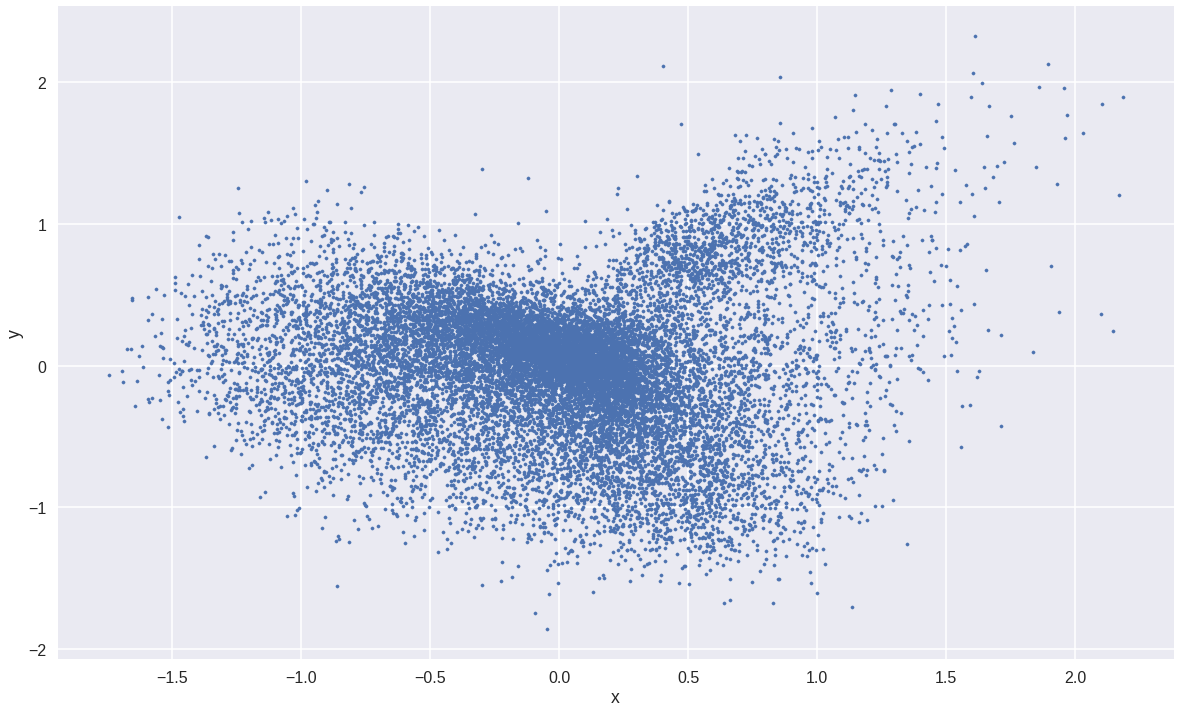

In [10]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [14]:
def plot_region(x_bounds,y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
#     print slice
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

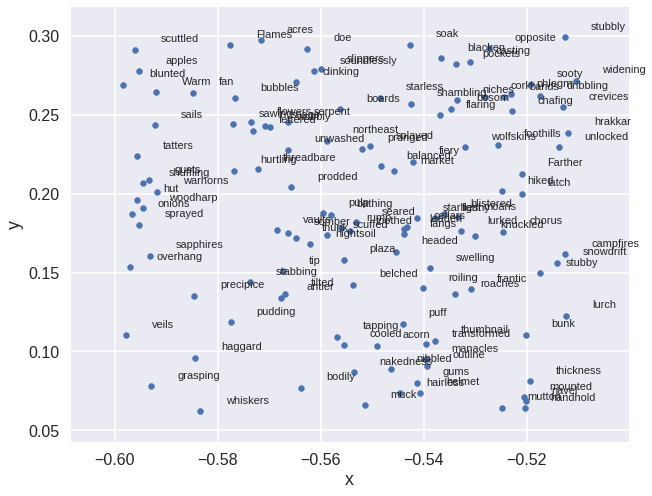

In [36]:
#PCA is not giving good results for word vectors

plot_region(x_bounds=(-0.6, -0.51), y_bounds=(0.06,0.3))

In [47]:
model.most_similar("Stark")

[(u'Eddard', 0.7589253187179565),
 (u'Lyanna', 0.6709155440330505),
 (u'Winterfell', 0.6521170735359192),
 (u'Rickard', 0.6271103620529175),
 (u'Robb', 0.6244508028030396),
 (u'executed', 0.618911623954773),
 (u'Brandon', 0.6186947822570801),
 (u'Dustin', 0.6139912605285645),
 (u'Hornwood', 0.6071378588676453),
 (u'direwolf', 0.6020591259002686)]

In [54]:
model.most_similar("Tyrion")

[(u'Jaime', 0.7128532528877258),
 (u'dwarf', 0.6711536645889282),
 (u'Cersei', 0.6490740776062012),
 (u'Bronn', 0.6437668800354004),
 (u'Shae', 0.6275721788406372),
 (u'Kevan', 0.6212352514266968),
 (u'Griff', 0.6120172739028931),
 (u'Littlefinger', 0.6047006845474243),
 (u'sourly', 0.6033239364624023),
 (u'Varys', 0.5858645439147949)]

In [55]:
model.most_similar("Daenerys")

[(u'Stormborn', 0.7938870191574097),
 (u'kneel', 0.7548620700836182),
 (u'khaleesi', 0.7537809610366821),
 (u'Targaryen', 0.7393235564231873),
 (u'Unburnt', 0.7351205348968506),
 (u'Dragons', 0.701688289642334),
 (u'Arianne', 0.6902897357940674),
 (u'khal', 0.6804009675979614),
 (u'Daario', 0.6789786219596863),
 (u'Xaro', 0.6764538884162903)]

In [56]:
def nearest_similar_cosine(s1,e1,e2):
    similarities = model.most_similar_cosmul(positive=[e2,s1],
                                            negative=[e1])
    s2 = similarities[0][0]
    print("{s1} is related to {e1}, as {s2} is related to {e2}".format(**locals()))
    return s2

In [60]:
nearest_similar_cosine("Stark", "Winterfell", "Riverrun")
nearest_similar_cosine("Jaime", "sword", "wine")
nearest_similar_cosine("Tyrion", "wine", "dragons")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as Cersei is related to wine
Tyrion is related to wine, as Dany is related to dragons


u'Dany'